# Bagging

Vamos a utilizar el siguiente dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Las siguientes celdas lo descargan e importan:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT' -O weather.csv

--2021-10-19 15:17:44--  https://docs.google.com/uc?export=download&id=1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT
Resolving docs.google.com (docs.google.com)... 142.251.45.110, 2607:f8b0:4004:83f::200e
Connecting to docs.google.com (docs.google.com)|142.251.45.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5uh0u2hbevdl6asu0qsm1q93g3desa1b/1634656650000/14260194928165318342/*/1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT?e=download [following]
--2021-10-19 15:17:45--  https://doc-08-74-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/5uh0u2hbevdl6asu0qsm1q93g3desa1b/1634656650000/14260194928165318342/*/1X0MT5YFVOduVogJ9cZKjCJ7fs-OdVuAT?e=download
Resolving doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googleusercontent.com)... 172.217.12.225, 2607:f8b0:4004:807::2001
Connecting to doc-08-74-docs.googleusercontent.com (doc-08-74-docs.googl

In [ ]:
df = pd.read_csv("/content/weather.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Vamos a descartar las columnas:

- Sunshine          
- Evaporation       
- Cloud3pm          
- Cloud9am  
- Location
- Date       
- WindGustDir
- WindDir9am 

In [ ]:
to_drop = ['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date', 'WindGustDir', 'WindDir9am']
df = df.drop(columns=to_drop)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 15)

Descartar todas las filas que tengan nulos:

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(119016, 15)

Separamos en X e y. Nuestro objetivo es predecir si va a llover mañana.

In [ ]:
X = df.drop("RainTomorrow", axis=1).copy()
y = df.RainTomorrow.copy()

Aplicamos train test split. El set de test tendrá un 20% de los datos con un random state de 42 y stratify.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Aplicar one hot encoder a las variables categóricas.

Recuerden hacer fit en train y luego en test solo transform.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False).fit(X_train[["WindDir3pm", "RainToday"]])

# Train

encoded = ohe.transform(X_train[["WindDir3pm", "RainToday"]])
encoded_df = pd.DataFrame(columns=ohe.get_feature_names(), data= encoded, index=X_train.index)

X_train = pd.concat([X_train, encoded_df],  axis='columns')

# Test

encoded_test = ohe.transform(X_test[["WindDir3pm", "RainToday"]])
encoded_test_df = pd.DataFrame(columns=ohe.get_feature_names(), data= encoded_test, index=X_test.index)

X_test = pd.concat([X_test, encoded_test_df],  axis='columns')



Dropear las columnas originales:

In [ ]:
X_train = X_train.drop(["WindDir3pm", "RainToday"], axis=1)
X_test = X_test.drop(["WindDir3pm", "RainToday"], axis=1)

Llevar el target a una variable numérica:

- 1 si va a llover mañana
- 0 si no va a llover mañana

In [ ]:
y_train = y_train.map({'Yes':1,'No':0})
y_test = y_test.map({'Yes':1,'No':0})

Entrenar un arbol de decision con:
- max_depth=10
- random_state=0

y obtener el classification report para train y test.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_train, train_pred))
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     74409
           1       0.79      0.56      0.65     20803

    accuracy                           0.87     95212
   macro avg       0.84      0.76      0.79     95212
weighted avg       0.86      0.87      0.86     95212

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18603
           1       0.70      0.49      0.58      5201

    accuracy                           0.84     23804
   macro avg       0.78      0.72      0.74     23804
weighted avg       0.83      0.84      0.83     23804



Ahora, usar un Bagging Classifier armado con árboles de decisión: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

Los árboles que usemos en este clasificador, deberán tener la misma profundidad máxima (max_depth) que el árbol que entrenamos recién.

Además usar: 

- n_estimators = 200
- n_jobs = -1 -> ¿Qué pasa si sacamos esto?
- random_state = 0 -> En el arbol y en el BaggingClassifier

In [ ]:
%%time
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10, random_state=0), n_estimators = 200, n_jobs = -1, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     74409
           1       0.85      0.56      0.67     20803

    accuracy                           0.88     95212
   macro avg       0.87      0.76      0.80     95212
weighted avg       0.88      0.88      0.87     95212

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     18603
           1       0.76      0.50      0.61      5201

    accuracy                           0.86     23804
   macro avg       0.82      0.73      0.76     23804
weighted avg       0.85      0.86      0.85     23804

CPU times: user 1.23 s, sys: 186 ms, total: 1.42 s
Wall time: 1min 37s


Ahora, probar con un RandomForestClassifier. 

Los hiperparámetros serán igual que los anteriores:

- max_depth=10
- n_estimators=200
- n_jobs=-1
- random_state=0

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, n_estimators = 200, n_jobs = -1, random_state=0)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     74409
           1       0.84      0.49      0.62     20803

    accuracy                           0.87     95212
   macro avg       0.85      0.73      0.77     95212
weighted avg       0.86      0.87      0.85     95212

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     18603
           1       0.78      0.46      0.58      5201

    accuracy                           0.85     23804
   macro avg       0.82      0.71      0.74     23804
weighted avg       0.85      0.85      0.84     23804

CPU times: user 38.9 s, sys: 188 ms, total: 39.1 s
Wall time: 20.3 s


Ahora, en el random forest, imprimir la importancia de las features:

In [ ]:
clf.feature_importances_

array([0.02881054, 0.02850598, 0.09102755, 0.06873099, 0.01320222,
       0.01649553, 0.0752408 , 0.36632465, 0.05386588, 0.07170833,
       0.02159009, 0.04216529, 0.00063554, 0.00066353, 0.00059856,
       0.00303354, 0.00157787, 0.00178885, 0.00224139, 0.0018103 ,
       0.00123713, 0.00080913, 0.00097969, 0.00115743, 0.00114065,
       0.00120665, 0.00156089, 0.00092983, 0.04669038, 0.0542708 ])

In [ ]:
fi = pd.DataFrame(columns=["FEATURE", "IMPORTANCE"])
fi["FEATURE"] = X_train.columns
fi["IMPORTANCE"] = clf.feature_importances_
fi = fi.sort_values("IMPORTANCE", ascending=False)

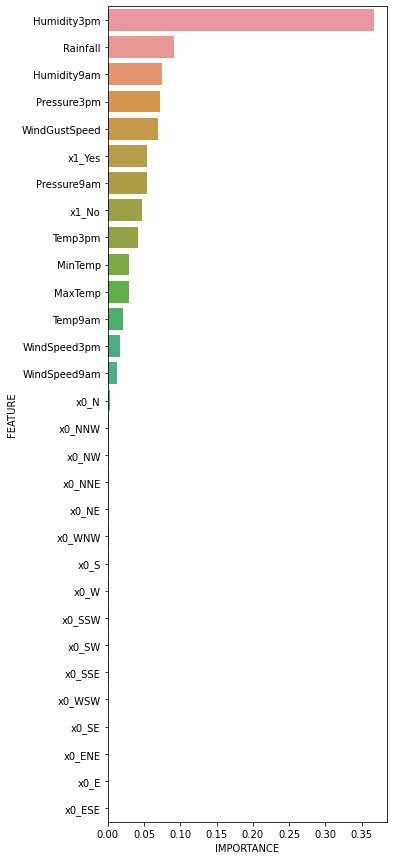

In [ ]:
plt.figure(figsize=(5, 15))
sns.barplot(y=fi.FEATURE, x=fi.IMPORTANCE)
plt.show()

Ahora, aplicar random forest en su proyecto del primer sprint.

Buscar los mejores hiperparámetros con grid search y finalmente imprimir el feature importance de las variables que utilizaron para entrenar.

# Boosting

Ahora, vamos a trabajar sobre los mismos datos que ya pre-procesamos pero vamos a entrenar modelos de boosting.

Arrancamos por Adaboost.

### Adaboost 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

En general, en Adaboost se utilizan como estimadores "débiles", árboles de decision con max_depth = 1.

Vamos a entrenar Adaboost utilizando:

- n_estimators = 200
- random_state = 0

Y evaluarlo. Imprimir el classification_report de train y de test.

Medir el tiempo que demora en entrenar Adaboost con %%time

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [1]:
#COMPLETAR

Imprimir feature importances de adaboost y graficar

In [ ]:
#COMPLETAR

### XGBOOST

Ahora probaremos XGBOOST: [https://xgboost.readthedocs.io/en/latest/python/index.html](https://xgboost.readthedocs.io/en/latest/python/index.html).

En google colab, xgboost ya está instalado por lo que no es necesario instalarlo. Si utilizan otro entorno, probablemente tengan que instalarlo con pip.

In [ ]:
from xgboost import XGBClassifier

Entrenar el classifier y generar las predicciones junto al classification report.

Podemos explorar sus hiperparámetros en: https://xgboost.readthedocs.io/en/latest/parameter.html

Utilizar como **n_estimators=200.**

Midan el tiempo con %%time y lo comparemos con Adaboost

In [ ]:
#COMPLETAR

En xgboost también podemos acceder a feature_importances. Graficar:

In [ ]:
#COMPLETAR

### LIGHT GBM

Otra librería que implementa un modelo de boosting muy eficiente es LightGBM: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

Vamos a probarla en nuestro conjunto de datos.

Entrenar, medir métricas y graficar feature importance.

Recuerden medir el tiempo que tarda en entrenar para comparar con los anteriores.

Vamos a utilizar 200 como n_estimators nuevamente, para comparar los resultados de todos los modelos.

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#COMPLETAR

### Stacking

Finalmente, armaremos un stacking de modelos utilizando sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

En este caso, los estimadores los tenemos que pasar en el parámetro "estimators" y el final estimator, en "final_estimator".

Utilizaremos los estimadores:

- random forest: RandomForestClassifier(max_depth=10, n_estimators = 200, n_jobs = -1, random_state=0)

- xgbooost: XGBClassifier(n_estimators=200)

- Ligth gbm: LGBMClassifier(n_estimators=200)

y como final estimator un DecisionTreeClassifier(max_depth=5)

Armar el modelo de stacking:


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [#COMPLETAR]

clf = #COMPLETAR


Entrenarlo e imprimir classification report (recuerden medir el tiempo).

Va a tardar unos minutos.

In [2]:
#COMPLETAR